In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('/content/Cust_Segmentation.csv')

In [3]:
dataset

,Age,Years Employed,Income,DebtIncomeRatio
0,41,6,19,6.3
1,47,26,100,12.8
2,33,10,57,20.9
3,29,4,19,6.3
4,47,31,253,7.2
...,...,...,...,...
845,27,5,26,6.8
846,28,7,34,7.0
847,25,0,18,33.4
848,32,12,28,2.9


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              850 non-null    int64  
 1   Years Employed   850 non-null    int64  
 2   Income           850 non-null    int64  
 3   DebtIncomeRatio  850 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 26.7 KB


In [31]:
X=dataset[['Age']]

In [32]:
y=dataset[['DebtIncomeRatio']]

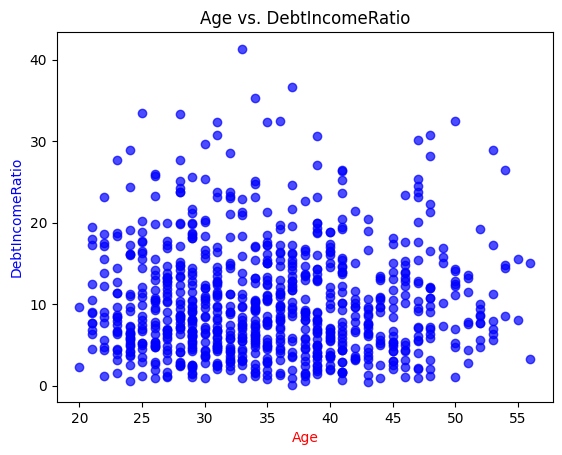

In [33]:
plt.scatter(X['Age'], y['DebtIncomeRatio'], c='blue', alpha=0.7)
plt.xlabel('Age', color='red')
plt.ylabel('DebtIncomeRatio', color='blue')
plt.title('Age vs. DebtIncomeRatio')
plt.show()

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
model=StandardScaler()

In [36]:
X_scaled = model.fit_transform(X)

<ipython-input-37-c7210cca7283>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_scaled[:, 0], X_scaled[:, 0], cmap='plasma')


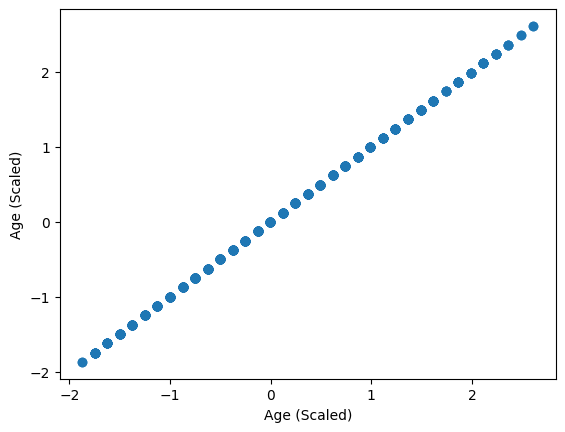

In [37]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 0], cmap='plasma')
plt.xlabel('Age (Scaled)')
plt.ylabel('Age (Scaled)')
plt.show()

In [38]:
from sklearn.cluster import KMeans

In [39]:
model=KMeans(n_clusters=2,n_init="auto",random_state=42)

In [40]:
model.fit(X_scaled)

KMeans(n_clusters=2, random_state=42)

In [41]:
labels=model.labels_

In [42]:
centers=model.cluster_centers_

In [43]:
print(centers)

[[ 0.92257425]
 [-0.75662942]]


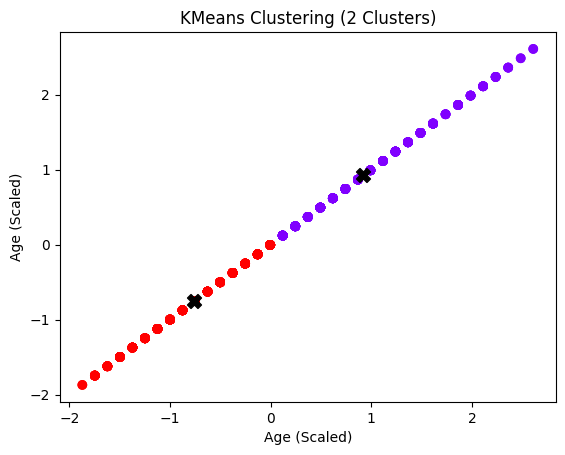

In [46]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 0], c=labels, cmap='rainbow')
plt.scatter(centers[:, 0], centers[:, 0], c='black', s=100, marker='X')
plt.xlabel('Age (Scaled)')
plt.ylabel('Age (Scaled)')
plt.title('KMeans Clustering (2 Clusters)')
plt.show()

In [47]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [48]:
silhouette_avg = silhouette_score(X_scaled, labels)
davies_bouldin = davies_bouldin_score(X_scaled, labels)

In [49]:
print("Silhouette Score:", silhouette_avg)
print("Davies-Bouldin Index:", davies_bouldin)

Silhouette Score: 0.5939785393414656
Davies-Bouldin Index: 0.5517484390639913


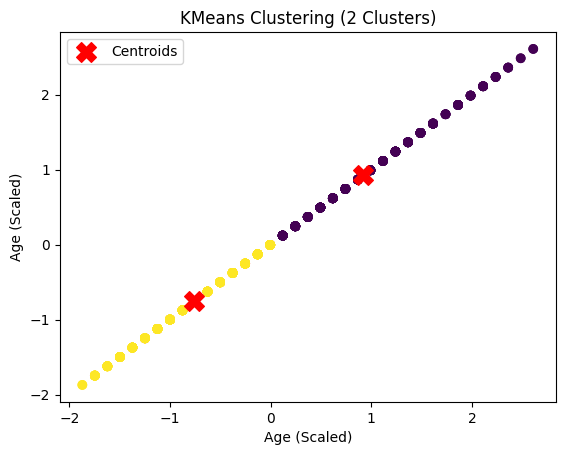

In [50]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 0], c=labels, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 0], c='red', s=200, marker='X', label='Centroids')
plt.xlabel('Age (Scaled)')
plt.ylabel('Age (Scaled)')
plt.title('KMeans Clustering (2 Clusters)')
plt.legend()
plt.show()